# Métodos numéricos para resolver Ecuaciones Diferenciales Ordinarias

## Método de Euler
Una partícula con una velocidad inicial $v$ en un campo gravitacional, la componente de la velocidad en la dirección del campo cambia. Ignorando por el momento el
hecho de que la solución exacta al movimiento de aceleración constante es bien conocida, usemos técnicas numéricas para aproximar la solución.

Para encontrar la velocidad v del proyectil, usamos la definición de aceleración:

$a=\frac{dv}{dt} \longrightarrow dv = a dt \longrightarrow \Delta v = a \Delta t$

Si se tiene la velocidad inicial, y el cambio en la velocidad entonces se puede saber la velocidad despúes de un tiempo 

$v=v_i + a\Delta t \longrightarrow v_{i+1}=\frac{d}{dt}v\Delta t$

De la misma manera se puede identificar la posición luego de un tiempo

$x_{i+1}=x_i + \frac{d}{dt}x\Delta t$ (2)

Este par de ecuaciones proveen de una buena aproximación a la solución si el $\Delta t$ es pequeño comparado con la concavidad de la curvatura de la solución (ver figura). 


<img src="EulerMethod.png" width="800" height="487">


Partiendo del punto $(t_1, x_1)$, tome la pendiente de $x(t)$ en ese punto y siga la pendiente a través del intervalo de tiempo $\Delta t$ para encontrar el valor aproximado de $x_2$. Repita este proceso desde el punto x_2 para encontrar x_3, y así sucesivamente. El error que se muestra en la figura es bastante grande, pero con un $\Delta t$ más pequeño. Para determinar la sensibilidad del método de Euler al tamaño de $\Delta t$, comience con una expansión de Taylor de $x(t)$

$$x(t+\Delta t)= x(t)+\dot{x}\Delta t + \ddot{x}\frac{\Delta t^2}{2}+\dots \tag{3}$$

Los dos primeros términos del lado derecho de la ecuación (3) son el método de Euler ecuaciones (1) y (2). El error en cada paso del método de Euler está en el orden de $\Delta t^2$, ya que ese es el primer término omitido en la expansión de Taylor. Pero, el número de pasos es $N = \tau / \Delta$ por lo que el error total al final de el proceso es del orden de $\Delta t$. Luego disminuir el tamaño de $\Delta t$ mejora linealmente resultado.

El método de Euler solo funciona en ecuaciones diferenciales de primer orden. Sin embargo, esto no es una limitación, porque el diferencial de orden superior
las ecuaciones se pueden expandir a sistemas de ecuaciones diferenciales de primer orden.

__Ejemplo:__ 

La ecuación para el movimiento armónico amortiguado viene dada por

$\ddot{x} = -\omega^2 x -\beta \dot{x}$ (4)

Podemos expresar esta ecuación diferencial de segundo orden como dos ecuaciones diferenciales de primer orden mediante la introducción de una nueva variable $v$.

$v \equiv \dot{x}$ (5)

Con esta definición, la ecuación (4) se convierte en

$$\dot{v} = -\omega^2 x -\beta v$ (6)

que es una ecuación diferencial de primer orden. Luego las ecuaciones de primer orden (5) y (6) juntas son equivalentes a la de segundo orden de la ecuación (4).



## Forma estándar para resolver EDO
Veremos varios métodos para resolver EDO en este documentos. primero vamos a desarrollar un "Forma Estándar" para resolución de EDO. De esa manera, podemos configurar cualquier problema una vez y luego usar el método de nuestra elección para resolverlo, con una cantidad mínima de reprogramación de nuestra parte.
Usemos un ejemplo para enmarcar la construcción de esta "Forma Estándar"

__Ejemplo:__ consideremos la ecuación diferencial para una partícula en caida libre:

$\ddot{x} = −g$   (7)

La ecuación (7) se puede dividir en dos ecuaciones de primer orden:

$\dot{x}=v$ y $\dot{v}=-g$

y si se define el vector 

$$y=\left[\begin{array}{c} x \\ v \end{array}\right]\tag{8}$$ 

la equación (7) se puede reescrivir como:

$$ \dot{y}=\left[\begin{array}{c}v\\-g\end{array}\right]\tag{9}$$

Las ecuaciones (8) y (9) definen el problema. La ecuación (8) define cómo se organizan las cosas que sabemos sobre el sistema en algún instante en el vector. Por otro lado la ecuación (9) define la ecuación diferencial que estamos resolviendo.

Esta notación vectorial nos permite dividir el proceso en dos partes: definición y resolución del problema. Definimos el problema con un función que devuelve las derivadas de cada elemento en $y$, como en la ecuación (9). Que en terminos de el método de Euler (equación (2))

$$ y_{i+1}=y_{i}+\dot{y}\Delta t \tag{10}$$

En el código a continuación definimos una función que devolverá las derivadas necesarias para calcule el movimiento de una partícula en caída libre, i.e. (9).

In [1]:
#Vamos a usar numpy
import numpy as np

#Declaramos la funcion
def CaidaLibre(y,t):
    """
    Programacio de la equacion (9).
    Toma un vector y (equacion (8)), y devuelve el vector de derivadas i.e. equacion (9) 
    """
    #El primer elemento de y (y[0]) es la posicion, luego su derivada es la velocidad, que es a su vez el segundo componente de y (y[1])
    ydot0 = y[1]
    #El segundo elemneto de y (y[1]) es la valocidad, luego su derivada es la aceleracion (en este problema constante) 
    ydot1 = -9.8
    #Devuelvo el vector resultado
    return np.array([ydot0,ydot1])

Note que le pasamos "tiempo" a la función del ejemplo anterior, pero no se usa explicitamente. El tiempo no entra en el problema, ya que el cambio en la velocidad es constante. La inclución del tiempo es debido a que estamos desarrollando un método para ODE y nuestro método debe incluir la capacidad de tratar con ecuaciones dependientes de variables independientes ( el tiempo en este caso).
Ahora que el problema está definido, necesitamos un método general para calcular el siguiente "estado" del sistema. Para esto vamos a usar el método de Euler. i.e. equación (10)

In [2]:
def Euler(y,t,dt,ydot):
    """
    Metodo de Euler para calcular un nuevo estado en el tiempo, dado el estado actual del sistema y, 
    un tiempo t, el paso temporal (o variable indempendiente) y la funcion de derivadas ydot.
    """
    #Entrega el vector en la ecuacion (10) 
    return y+ydot(y,t)*dt

Ahora usamos estas dos nociones en un programa

__Ejemplo:__ Programa que muestre el movimiento de una masa que oscila en el final de un resorte, en un campo gravitacional. La fuerza sobre la masa debe estar dada por $F = −mg + kx$. La ecuación diferencial está dada por:

$$\frac{d^2y}{dt^2}= - \frac{k}{m}y - g$$

si la dividimos en dos ecuaciones $\frac{dy}{dt} = v$ y $ \frac{dv}{dt}= - \frac{k}{m} y - g$. 

In [3]:
#Importamos la libreria que necesitamos
import numpy as np

# Numero de pasos 
N = 10000
# Posicion inicial de la masa
x_0 = 0.0
# Velocidad inicial
v_0 = 0.0
# Tiempo total
tau = 10.0
# tamaño de paso
dt = tau/(N-1)
# Constante del resorte
k = 4.0
# masa
m = 0.5
# Aceleracion gravitacional
gravedad = 9.8

#Usamos un rango lineal de pylab, desde 0 hasta tau, con N puntos
tiempo = np.linspace(0,tau,N)

#Para gaurdar los resultados, creamos un arreglo de NX2 elementos
y = np.zeros([N,2])#
#Ponemos los valores iniciales en el vector de resultados
y[0,0] = x_0
y[0,1] = v_0 

#Definamos la funcion diferencial
def Resonador(y,t):
    """
    Ecuacion diferencial para resorte
    """
    #El primer elemento de y (y[0]) es la posicion, luego su derivada es la velocidad, que es a su vez el segundo componente de y (y[1])
    ydot0 = y[1]
    #El segundo elemneto de y (y[1]) es la valocidad, luego su derivada es la aceleracion (en este problema el cambio en la fuerza) 
    ydot1 = -(k/m)*y[0]-gravedad 
    #Devuelvo el vector resultado
    return np.array([ydot0,ydot1])

#Utilizamos un for para recorrer el rango
for i in range(N-1):
    #Utilizamos la funcion construida anteriormente
    y[i+1] = Euler(y[i],tiempo[i],dt,Resonador)

#creamos los arreglos
datos_y = np.zeros([N])
datos_v = np.zeros([N])
ceros = np.zeros([N])

# Llenamos los arreglos 
for i in range(N):
    datos_y[i] = y[i,0]
    datos_v[i] = y[i,1]

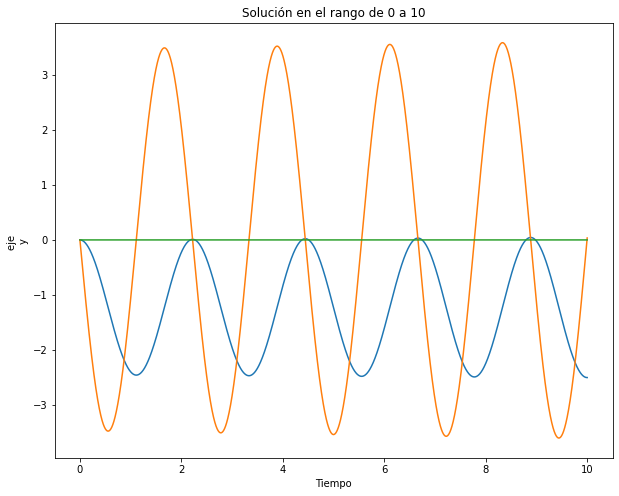

In [4]:
#Ahora grafiquemos
import matplotlib.pyplot as plt
# Se define el plot
fig, ax = plt.subplots(figsize=(10, 8))

# los valores de x e y
ax.plot(tiempo, datos_y)
ax.plot(tiempo, datos_v)
ax.plot(tiempo, ceros)

# Se ponen titulo y nombre de los ejes
ax.set(title = "Solución en el rango de 0 a 10",
       xlabel = "Tiempo",
       ylabel = "eje \ny")

plt.show()

### Problemas con el método de Euler
El método de Euler es fácil de entender, pero tiene un gran problema. Dado que el método se aproxima a la solución como una ecuación lineal, la solución siempre subestima la curvatura de la solución. Por lo que para cualquier tipo de movimiento oscilatorio, la energía de la solución de Euler aumenta con el tiempo.

En la gráfica de la solución anterior puede ver que la velocidad máxima está aumentando incluso después de solo dos ciclos. Si cambiamos el tiempo total de la simulación $\tau$ a 20 segundos en el ejemplo anterior, el error es más visible, este aumenta de forma exponencial (haga el intento). 

Una forma de corregir este comportamiento es aumentando el número de pasos N (intentelo) pero el error sigue ahí y sigue aumentando exponencialmente con cada paso. Incluso aumentando el número de pasos al absurdo no elimina el problema.

## Método de Euler-Cromer
Hay una solución muy simple para el método de Euler que hace que funcione mejor para sistemas oscilatorios. El método de Euler utiliza la posición
$x_i$ y velocidad $\dot{x}_i$ en el paso $i$ para encontrar la posición $x_{i + 1}$. Resulta que los errores se cancelan exactamente, para un movimiento armónico simple si en lugar de $x_i$ y $\dot{x}_i$ usamos $x_i$ y $\dot{x}_{i+1}$ . En otras palabras, use la posición actual y la velocidad siguiente para encontrar la siguiente posición.
Aunque esta es una solución inteligente para el problema, se debe de tener cuidado con esto. El llamado método Euler-Cromer da buenos resultados para movimiento armónico, pero no es inmediatamente obvio que daría la misma mejora para otras EDO para las que no conocemos solución. 



### Ejercicios Euler:

1. Modifique el ejemplo anterior con Euler-Crome y muestre que el problema se soluciona. 

2. Exprese cada una de estas ecuaciones diferenciales como un conjunto de diferencias de primer orden.
    $$m\ddot{x}=f(x,t)$$
    $$A\ddot{x}+B\dot{x}+C=D $$
    $$m\ddot{\Theta}=\sqrt{\frac{g}{L}}\sin\Theta-\dot{\Theta}+\gamma\sin\omega t$$

3. El número de átomos radiactivos que se desintegran en un período de tiempo determinado es proporcional al número de átomos en la muestra:
    $$ \frac{dN}{dt}= −\lambda N$$

    Escribe un programa que use el método de Euler para graficar $N(t)$. Grafique también en el programa la solución exacta, $N(t) = N_0 e^{−\lambda t}$, para comparar.

4. Escriba una función de "derivada" apropiada para cada una de las ecuaciones diferenciales en el problema 2.

## Métodos de Runge-Kutta
La técnica general más popular y estable para resolver EDO es un conjunto de métodos conocidos como métodos de "Runge-Kutta". Definimos $g \equiv\dot{y}$, luego tenemos que $g$ es en general una función tanto de $y$ como de $t$, entonces podemos aproximar la solución en el punto $t + \Delta t$ con (Una de las posibles)

$$y(t +\Delta t) = y + \frac{1}{2}k_1 + \frac{1}{2}k_2 +O(\Delta t^3)$$

donde $k_1 = \Delta t g(y,t)$ y $k_2 = \Delta t g(y+k_1,t+\Delta t)$ .

Conceptualmente, este método de Runge-Kutta de segundo orden es equivalente a tomar el promedio de la pendiente en $t$ y en $t + \Delta t$ y usando ese promedio en el método de Euler para encontrar el nuevo valor de $y(t +\Delta t)$.

El error en el método de Runge-Kutta de segundo orden es del orden de $\Delta t^3$ por paso, entonces después de $N = frac{\tau}{\Delta t}$  pasos el error total es del orden de $\Delta t^2$. Este error es una mejora significativa con respecto al método de Euler, incluso considerando el aumento en el esfuerzo computacional. Si es $frac{\Delta t}{\tau}\sim 0.01$, luego el error en comparación con el método de Euler se reduce en aproximadamente $100$, para un aumento de costo de aproximadamente el doble. 

Este método de Runge-Kutta de segundo orden proviene de tomar una expansión de la función que estamos tratando de resolver, y luego mantener los términos de orden dos en $\Delta t$ en esa expansión. Como se podrá imaginar, es posible aceptar más términos y obtener una precisión aún mayor.

__Ejemplo:__ Modifiquemos el código del ejemplo anteriro para usar Runge-Kutta en lugar del método de Euler y ver la diferencia. Primero creamos una función RK2 con el método.

In [5]:
# Metodo de Runge-Kutta de segundo orden 
def RK2(y,t,dt,ydot):
    """
    Metodo de Runge-Kutta de segundo orden 
    """
    #Calculo las Ks
    k_1 = dt*ydot(y,t)
    k_2 = dt*ydot(y+k_1,t+dt)
    # Devuelvo la proyeccion
    return y + 0.5*(k_1+k_2)

Ahora modificamos el código del ejemplo para usar RK2 en lugar de Euler

In [6]:
#Importamos la libreria que necesitamos
import numpy as np

# Numero de pasos 
N = 10000
# Posicion inicial de la masa
x_0 = 0.0
# Velocidad inicial
v_0 = 0.0
# Tiempo total
tau = 10.0
# tamaño de paso
dt = tau/(N-1)
# Constante del resorte
k = 4.0
# masa
m = 0.5
# Aceleracion gravitacional
gravedad = 9.8

#Usamos un rango lineal de pylab, desde 0 hasta tau, con N puntos
tiempo = np.linspace(0,tau,N)

#Para gaurdar los resultados, creamos un arreglo de NX2 elementos
y = np.zeros([N,2])#
#Ponemos los valores iniciales en el vector de resultados
y[0,0] = x_0
y[0,1] = v_0 

#Definamos la funcion diferencial
def Resonador(y,t):
    """
    Ecuacion diferencial para resorte
    """
    #El primer elemento de y (y[0]) es la posicion, luego su derivada es la velocidad, que es a su vez el segundo componente de y (y[1])
    ydot0 = y[1]
    #El segundo elemneto de y (y[1]) es la valocidad, luego su derivada es la aceleracion (en este problema el cambio en la fuerza) 
    ydot1 = -(k/m)*y[0]-gravedad 
    #Devuelvo el vector resultado
    return np.array([ydot0,ydot1])

#Utilizamos un for para recorrer el rango
for i in range(N-1):
    #Utilizamos la funcion construida anteriormente
    y[i+1] = RK2(y[i],tiempo[i],dt,Resonador)

#creamos los arreglos
datos_y = np.zeros([N])
datos_v = np.zeros([N])
ceros = np.zeros([N])

# Llenamos los arreglos 
for i in range(N):
    datos_y[i] = y[i,0]
    datos_v[i] = y[i,1]

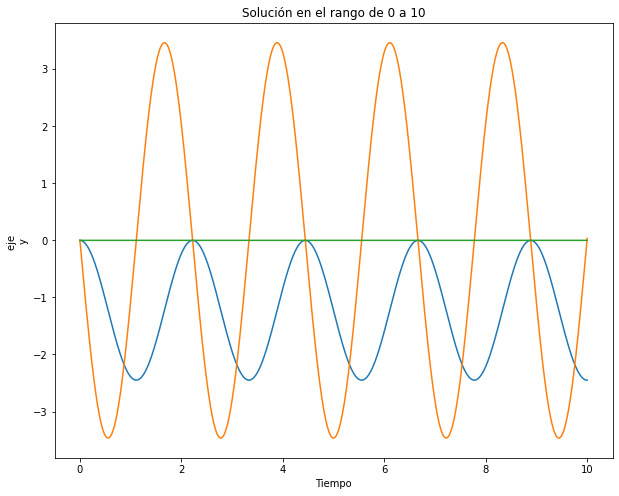

In [10]:
fig1, ax1 = plt.subplots(figsize=(10, 8))

# los valores de x e y
ax1.plot(tiempo, datos_y)
ax1.plot(tiempo, datos_v)
ax1.plot(tiempo, ceros)

# Se ponen titulo y nombre de los ejes
ax1.set(title = "Solución en el rango de 0 a 10",
       xlabel = "Tiempo",
       ylabel = "eje \ny")

plt.show()

### Ejercicios Runge-Kutta:
Resuelva los ejercicios de Euler, con el método de RK2 y comparelos.
